In [7]:
import numpy as np
import os

def read_matrix_from_file(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        matrix = [[int(x) for x in line.split()] for line in lines[1:]]
    return np.array(matrix)


matrix1 = read_matrix_from_file("C:\\Users\\alexp\\source\\repos\\PP_LAB3\\x64\\Release\\matrix1.txt")
matrix2 = read_matrix_from_file("C:\\Users\\alexp\\source\\repos\\PP_LAB3\\x64\Release\\matrix2.txt")
result_matrix_cpp = read_matrix_from_file("C:\\Users\\alexp\\source\\repos\\PP_LAB3\\x64\\Release\\result_matrix.txt")

result_matrix_numpy = np.dot(matrix1, matrix2)

if np.array_equal(result_matrix_numpy, result_matrix_cpp):
    print("Результаты совпадают")
else:
    print("Результаты не совпадают")

Результаты не совпадают


In [11]:
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import pandas as pd


def read_results(filename):
    sizes = []
    computation_times = []
    with open(filename, 'r') as file:
        while True:
            tmp = []
            size_line = file.readline().strip()
            if not size_line:
                break
            size = int(size_line)
            task_size = int(file.readline().strip())
            for i in range(0, 10):
                comp_time = file.readline().strip()
                if not comp_time:
                    break
                tmp.append(int(comp_time))

            sizes.append(size)
            computation_times.append(tmp)
    return sizes, computation_times


def plot_intervals(sizes, intervals):
    means = [interval[0] for interval in intervals]
    lower_bounds = [interval[1][0] for interval in intervals]
    upper_bounds = [interval[1][1] for interval in intervals]

    plt.errorbar(sizes, means, yerr=[(upper-lower)/2 for upper, lower in zip(upper_bounds, lower_bounds)], fmt='o-', capsize=5)
    plt.xlabel('Размер матрицы')
    plt.ylabel('Время умножения')
    plt.grid(True)
    plt.show()


def get_intervals(computation_times):
    gamma = 0.95
    intervals = []
    for time in computation_times:
        n = len(time)
        x_mean = np.mean(time)
        s = np.sqrt(st.variance(time))
        confidence_interval = sts.t.interval(gamma, df=n-1, loc=x_mean, scale=s/np.sqrt(n))
        intervals.append([x_mean, confidence_interval])
    return intervals



sizes, computation_times = read_results("C:\\Users\\alexp\\source\\repos\\PP_LAB3\\x64\\Release\\stats_mpi8.txt")
arr = pd.DataFrame({"sizes":sizes, "times":computation_times})
intervals = get_intervals(computation_times)


In [12]:
arr

,sizes,times
0,500,"[132, 130, 127, 128, 134, 126, 125, 123, 122, ..."
1,600,"[218, 201, 223, 201, 206, 208, 199, 207, 204, ..."
2,700,"[318, 368, 332, 339, 354, 363, 421, 396, 416, ..."
3,800,"[497, 442, 471, 483, 485, 446, 490, 480, 464, ..."
4,900,"[788, 761, 800, 762, 758, 761, 780, 778, 766, ..."
5,1000,"[939, 949, 959, 955, 965, 951, 946, 952, 950, ..."
6,1100,"[1404, 1423, 1482, 1502, 1448, 1412, 1388, 145..."
7,1200,"[1490, 1512, 1479, 1513, 1445, 1471, 1480, 143..."
8,1300,"[2330, 2362, 2312, 2350, 2332, 2341, 2381, 233..."
9,1400,"[2542, 2515, 2483, 2436, 2489, 2471, 2477, 245..."


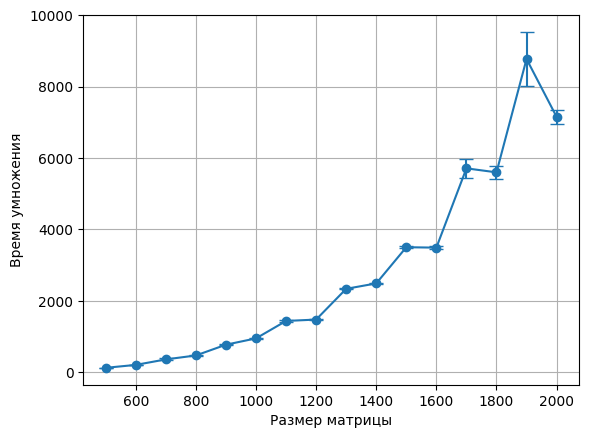

In [13]:
plot_intervals(sizes, intervals)

## MPI

Для 2 ядер

![title](2.png)

Для 4 ядер

![title](4h.png)

Для 6 ядер

![title](6.png)

Для 8 ядер

![title](8.png)

Вывод: Технология MPI улучшила время перемножения матриц в сравнении с OpenMP, но видны большие скачки времени обработки и большое количество неровных кривых интервалов зависимости времени от размерности.